# **Create visualizations using Matplotib and Seaborn** 

# __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            </ol>
    </li>
    <li>
        <a href="#Scenario">Scenario</a>
        <ol>
            <li><a href="#Data Description">Data Description</a></li>
        </ol>
    </li>
    <li><a href="#Importing Data">Importing data</a></li>
    <li><a href="#Creating Visualizations for Data Analysis">Creating Visualizations for Data Analysis</a></li>
</ol>


# Objectives

After completing this lab you will be able to:

- Create informative and visually appealing plots with Matplotlib and Seaborn.
- Apply visualization to communicate insights from the data.
- Analyze data through using visualizations.
- Customize visualizations


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.


In [24]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


# Importing Data


In [25]:
#from js import fetch
import requests
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
#resp = await fetch(URL)
resp = requests.get(URL)
# text = io.BytesIO((await resp.arrayBuffer()).to_py())
text = resp.content

df = pd.read_csv(URL)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [26]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [27]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

In [28]:
df["Recession"].value_counts()

0    415
1    113
Name: Recession, dtype: int64

### TASK 1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


<p>You will require:-
<br>to group the year and calculate the average on the 'Automobile Sales', as the data has years and months column
<br>make use of .plot() with kind = 'line'
<br>donot forget to include labels and title
</p>


Text(1997, 40000, 'Recession 2000-2001')

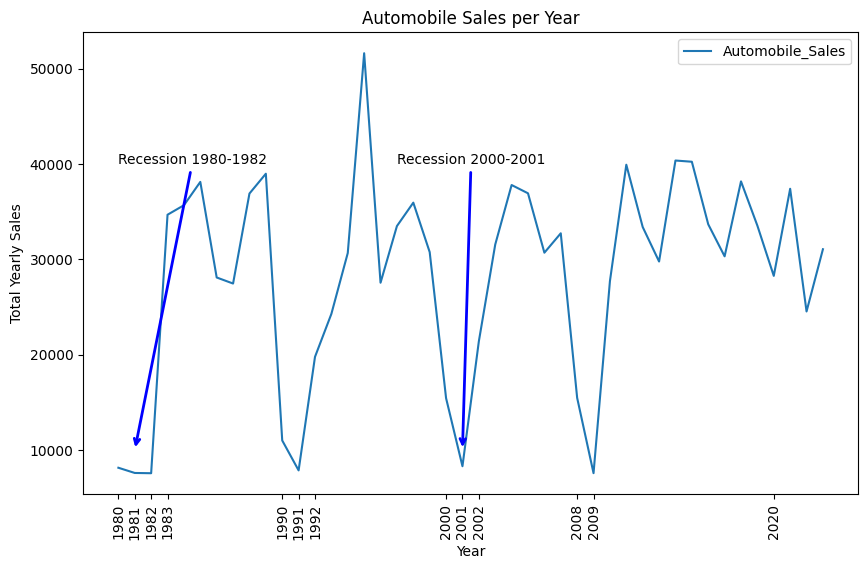

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xticks(df[df["Recession"] == 1]["Year"].unique())

df[["Year", "Automobile_Sales"]].groupby("Year").sum().reset_index().plot(
    kind="line",
    x="Year",
    y="Automobile_Sales",
    title="Automobile Sales per Year",
    ylabel="Total Yearly Sales",
    ax=ax,
    rot=90,
)
ax.annotate(
    "Recession 1980-1982",
    xy=(1981, 10000),
    xytext=(1980, 40000),
    xycoords="data",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="blue", lw=2),
)

ax.annotate(
    "Recession 2000-2001",
    xy=(2001, 10000),
    xytext=(1997, 40000),
    xycoords="data",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="blue", lw=2),
)

### Include the following on the plot
ticks on x- axis with all the years, to identify the years of recession 
<br>annotation for at least two years of recession
<br> 


<p>You can create the list for the range 1980 till 2023 and pass that list to the plt.xticks function or you can directly pass the range to the function.
<br>You might need to rotate the ticks to an angle so that they fit in well on the axis
<br>You can include annotation with plt.text(x, y, 'text to display')</p>

Text(1997, 40000, 'Recession 2000-2001')

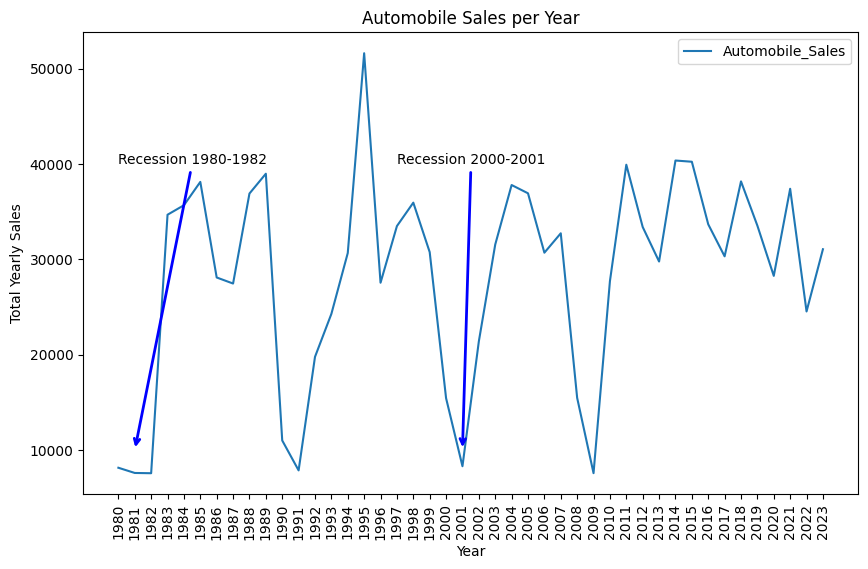

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xticks(df["Year"].unique())

df[["Year", "Automobile_Sales"]].groupby("Year").sum().reset_index().plot(
    kind="line",
    x="Year",
    y="Automobile_Sales",
    title="Automobile Sales per Year",
    ylabel="Total Yearly Sales",
    ax=ax,
    rot=90,
)
ax.annotate(
    "Recession 1980-1982",
    xy=(1981, 10000),
    xytext=(1980, 40000),
    xycoords="data",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="blue", lw=2),
)

ax.annotate(
    "Recession 2000-2001",
    xy=(2001, 10000),
    xytext=(1997, 40000),
    xycoords="data",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="blue", lw=2),
)


---



###  TASK 2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


<p>You will require:-
    <br>create a separate dataframe where the column recession has a value of '1'
    <br>to group the year, vehicle_type and calculate the average on the 'Automobile Sales'
    <br>one way is to -
    <br>use as_index as false else you will endup with multiple-indexed datafame
    <br>later set year as index and groupby vehicle over Sales and plot
    <br>make use of .plot() with kind = 'line'
    <br>do not forget to include labels and title
</p>


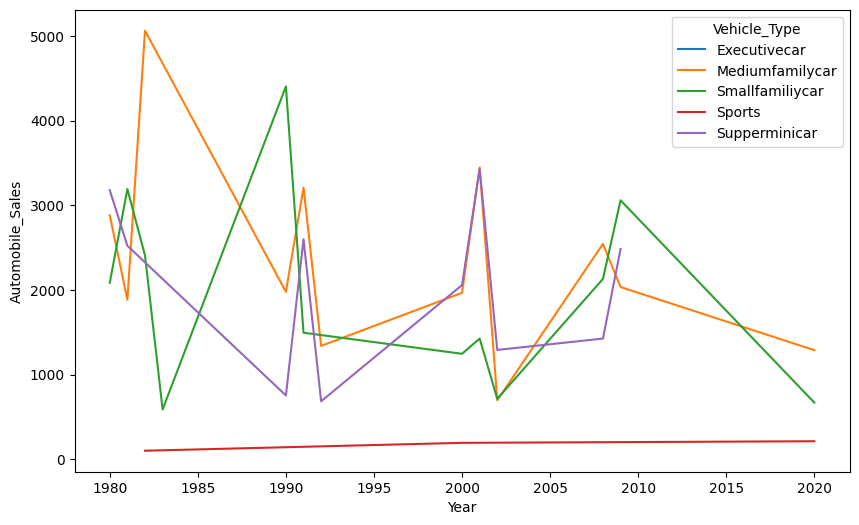

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
t_df = (
    df[df["Recession"] == 1][["Year", "Vehicle_Type", "Automobile_Sales"]]
    .groupby(["Vehicle_Type", "Year"])
    .sum()
    .reset_index()
)

sns.lineplot(data=t_df, x="Year", y="Automobile_Sales", hue="Vehicle_Type")
plt.show()

#### From the above plot, what insights have you gained on the sales of various vehicle types?<br> Type in your answer below:


My Answer:
Medium family cars used to be prevalent, but small family cars have since surpassed them. This shift may be due to a decline in birth rates. Additionally, the steady demand for sports cars could indicate a consistent interest in performance and style among consumers.

----


### TASK 3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


<p>To visualize the average number of vehicles sold during recession and non-recession periods, you can use a bar chart
        <br> You will need to group recession average Automobile_Sales and then plot it<br>
    Make use of sns.barplot(x=x,y=y, data = df)</p>

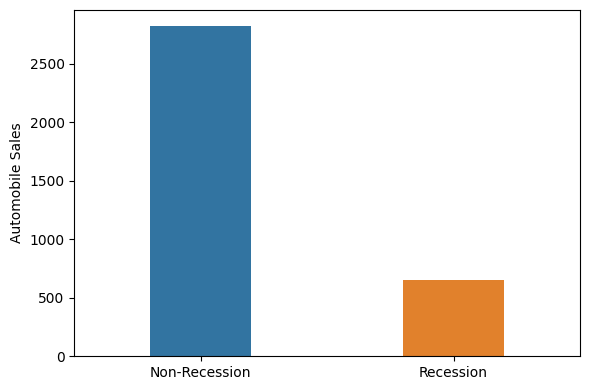

In [45]:
import matplotlib.pyplot as plt
avg_sales = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
custom_colors = ['#125B9A', '#F05A7E']
plt.figure(figsize=(6,4))
bar_plot = sns.barplot(x='Recession', y='Automobile_Sales', data=avg_sales, hue=custom_colors)

#adjust position
for index, bar in enumerate(bar_plot.patches):
    bar.set_x(bar.get_x() + (0.2 if index == 0 else -0.2)) 

plt.xlabel('')
plt.ylabel('Automobile Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])

plt.legend().remove()
plt.tight_layout()
plt.show()

### Now you want to compare the sales of different vehicle types during a recession and a non-recession period
<br>We recommend that you use the functionality of **Seaborn Library** to create this visualization


<p>To visualize sales of different vehicles during recession and non-recession periods, you can use a bar chart
        <br> You will need to group Recession, Vehicle_Type for average Automobile_Sales and then plot it<br>
    Make use of sns.barplot(x=x,y=y, data = df)</p>


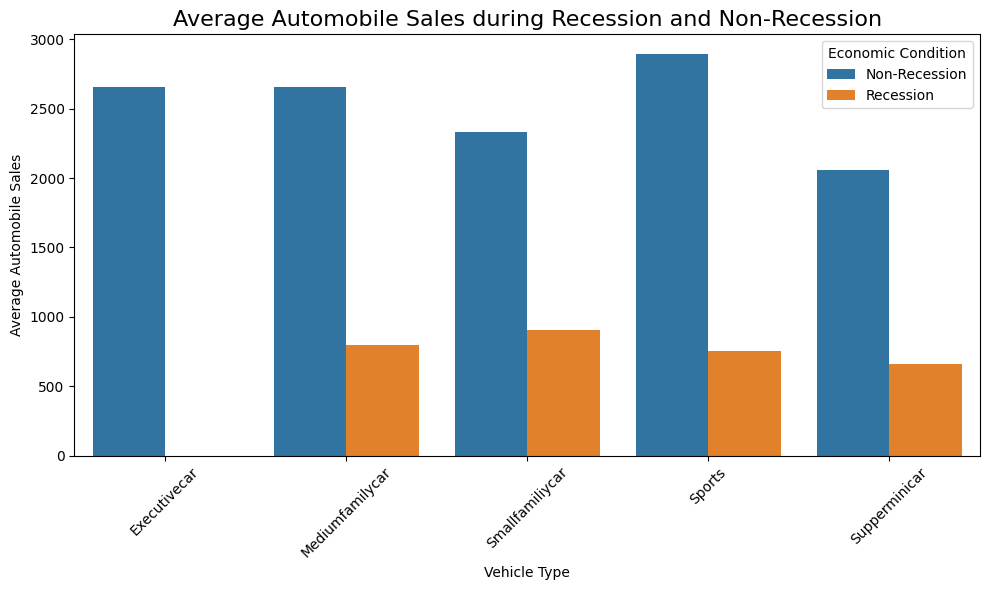

In [33]:
import matplotlib.pyplot as plt
df['Recession'] = df['Year'].apply(lambda x: 'Recession' if (1980 <= x <= 1982) or (2000 <= x <= 2001) else 'Non-Recession')

# Calculate average automobile sales per vehicle type and recession status
avg_sales = df.groupby(['Vehicle_Type', 'Recession'])['Automobile_Sales'].mean().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession', data=avg_sales, errorbar="sd")


plt.title('Average Automobile Sales during Recession and Non-Recession', fontsize=16)
plt.xlabel('Vehicle Type')
plt.ylabel('Average Automobile Sales')
plt.xticks(rotation=45)
plt.legend(title='Economic Condition')

plt.tight_layout()
plt.show()

### From the above chart what insights have you gained on the overall sales of automobiles during recession? <br> Type your answer below:-


My answer:
Any type of car sales underperform during the recession, people got no money buying it.

### TASK 4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, you want to find more insights from the data to understand the reason. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods? 
<br>Make use of <u>add_subplot()</u> from Matplotlib for this comparision.


Data downloaded and read into a dataframe!


Text(0.5, 0.98, 'Comparing GDP in Recession and Non-recession periods')

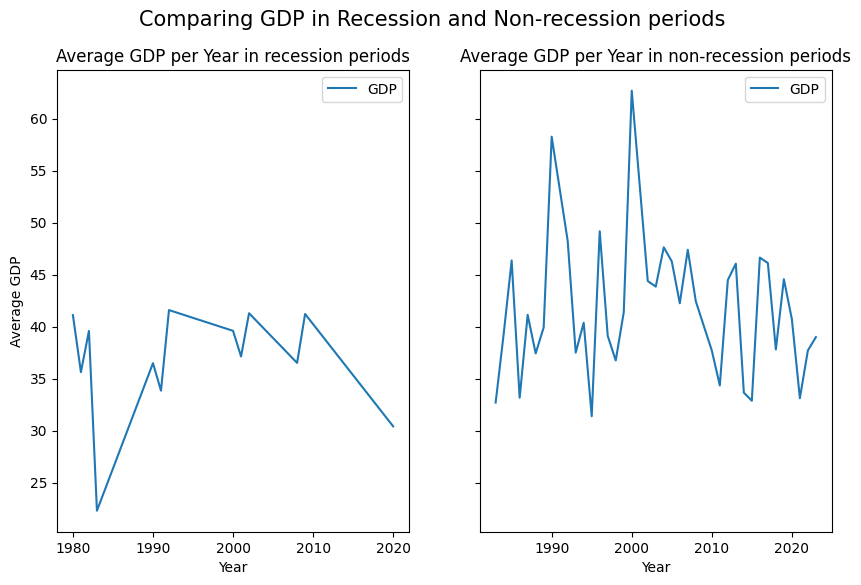

In [34]:
import matplotlib.pyplot as plt
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = requests.get(URL)
text = resp.content

df = pd.read_csv(URL)
print('Data downloaded and read into a dataframe!')

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

df_rec = df[df["Recession"] == 1]
df_no_rec = df[df["Recession"] == 0]

df_rec[["GDP", "Year"]].groupby("Year").mean().reset_index().plot(
    kind="line",
    x="Year",
    y="GDP",
    ax=axs[0],
    ylabel="Average GDP",
    title="Average GDP per Year in recession periods",
)
df_no_rec[["GDP", "Year"]].groupby("Year").mean().reset_index().plot(
    kind="line",
    x="Year",
    y="GDP",
    ax=axs[1],
    title="Average GDP per Year in non-recession periods",
)

fig.suptitle("Comparing GDP in Recession and Non-recession periods", fontsize=15)

---


### TASK 5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'


<p>You can create Bubble Chart by calling the scatter()
        <br>Pass the 'Month' and 'Automobile_Sales' to the functions as x and y and then use Seasonality weight for size parameter</p>


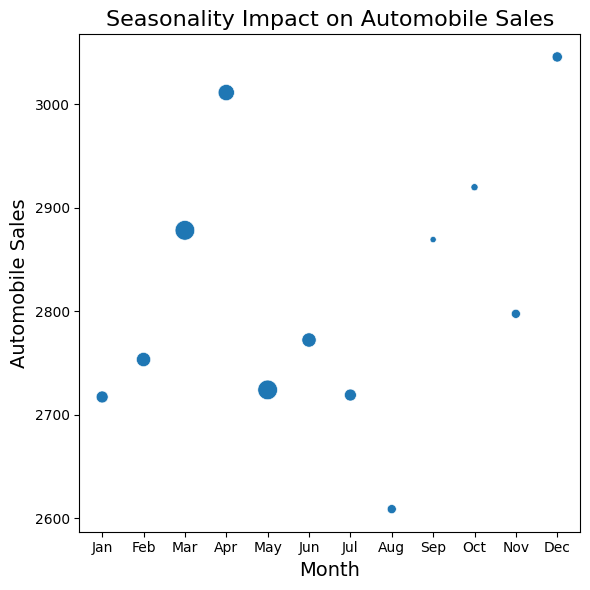

In [35]:
months = [
    "Jan","Feb","Mar","Apr","May","Jun",
    "Jul","Aug","Sep","Oct","Nov","Dec",
]

df_seas = (
    df_no_rec[["Seasonality_Weight", "Automobile_Sales", "Month"]]
    .groupby("Month")
    .mean()
    .reindex(months, axis=0)
    .reset_index()
)

# Creating the scatter plot
plt.figure(figsize=(6, 6))  
scatter = sns.scatterplot(
    data=df_seas,
    x="Month",
    y="Automobile_Sales",
    size="Seasonality_Weight",
    sizes=(20, 200),  # Set size range for bubbles
    legend=False,      # Hide the legend for sizes
)


scatter.set_title("Seasonality Impact on Automobile Sales", fontsize=16)
scatter.set_xlabel("Month", fontsize=14)
scatter.set_ylabel("Automobile Sales", fontsize=14)

# Show the plot
plt.tight_layout()       
plt.show()

---


 ### TASK 6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


<p>You can create dataframe where recession is '1'.
        <br>Pass the 'Consumer_Confidence' and 'Automobile_Sales' to the plt.scatter()</p>

/Users/harris/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Figure size 1000x600 with 0 Axes>

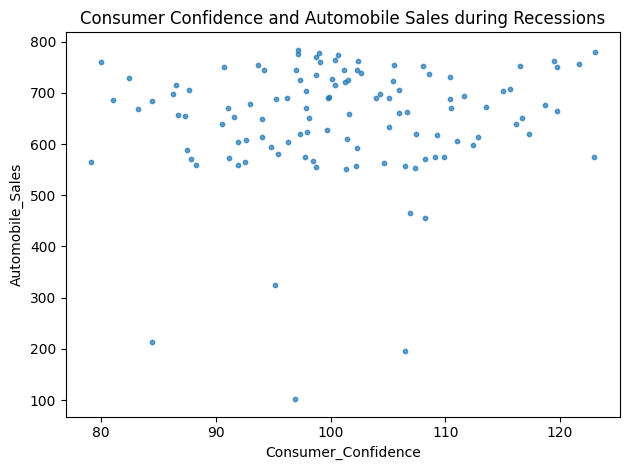

In [36]:
df_rec = df[df["Recession"] == 1]

# Create the scatter plot
plt.figure(figsize=(10, 6))  
scatter = df_rec.plot(
    kind="scatter",
    x="Consumer_Confidence",
    y="Automobile_Sales",
    title="Consumer Confidence and Automobile Sales during Recessions",
    alpha=0.7,    
    s=10          
)

plt.tight_layout() 
plt.show()


 ### How does the average vehicle price relate to the sales volume during recessions?
 <br> Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'


<Figure size 1000x600 with 0 Axes>

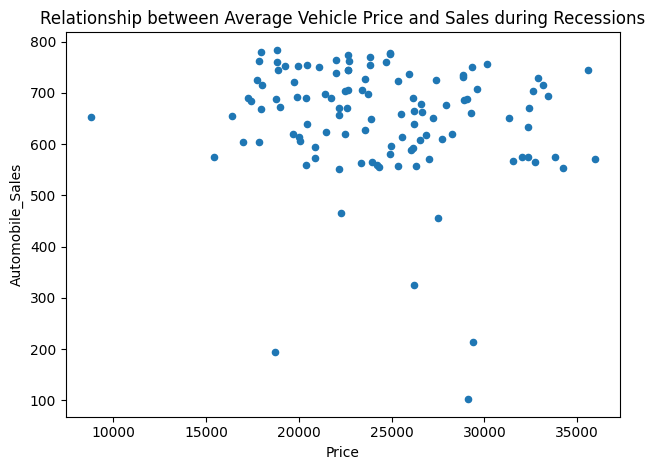

In [37]:
df_rec = df[df["Recession"] == 1]
plt.figure(figsize=(10, 6))  
df_rec.plot(
    kind="scatter",
    x="Price",
    y="Automobile_Sales",
    title="Relationship between Average Vehicle Price and Sales during Recessions",
)
plt.tight_layout()  # Adjust layout
plt.show()

----


 ### TASK 7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


<p>You can create two dataframe for recession and nonreccession period.
    <br> Calculate the sum of Advertising_Expenditure for both dataframes
    <br> Pass these total values to plt.pie(). May include labels as ['Recession', 'Non-Recession']
        <br>Feel Free to customie the pie further
    <br>title this plot as  - Advertising Expenditure during Recession and Non-Recession Periods</p>

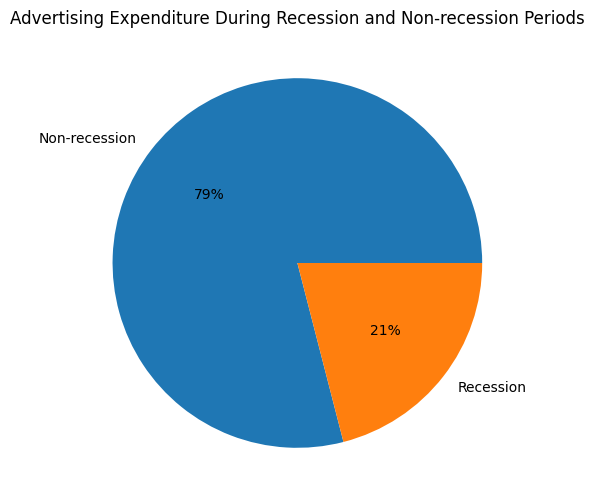

In [38]:
pie_df = df[["Advertising_Expenditure", "Recession"]].groupby("Recession").sum()
plt.figure(figsize=(10, 6)) 
pie_df["Advertising_Expenditure"].plot(
    kind="pie",
    labels=["Non-recession", "Recession"],
    autopct="%.0f%%",
    ylabel="",
    title="Advertising Expenditure During Recession and Non-recession Periods",
)
plt.show()

#### From the above plot, what insights do you find on the advertisement expenditure during recession and non recession periods?<br> Type your answer below:-


My answer:
The company invests heavily in advertising during non-recession periods, likely because car sales are performing well and they have sufficient funds to cover advertising expenses. However, during recessions, they cut back on spending to save money.

---


### TASK 8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 


<p>You will be required to group vehicle type for sum of advertisement expenditure.
    <br> the plot a pie with the data, May include relevant labels
    <br>title this plot as  - Share of Each Vehicle Type in Total Expenditure during Recessions</p>

<Figure size 1000x600 with 0 Axes>

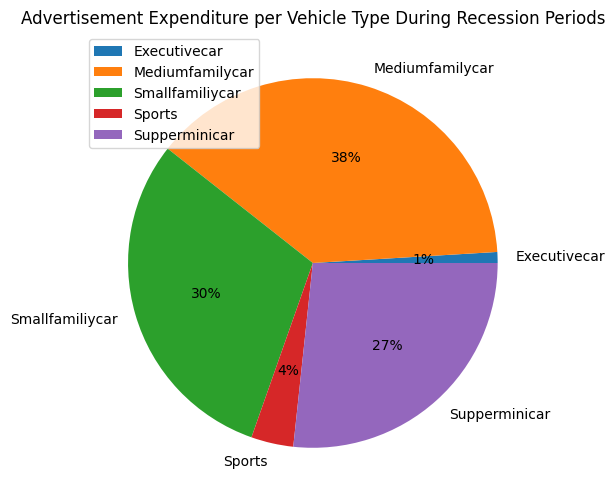

In [39]:
df_rec = df[df["Recession"] == 1]
plt.figure(figsize=(10, 6)) 

type_pie = (
    df_rec[["Vehicle_Type", "Advertising_Expenditure"]].groupby("Vehicle_Type").sum()
)

type_pie.plot(
    kind="pie",
    y="Advertising_Expenditure",
    ylabel="",
    figsize=(10, 6),
    autopct="%.0f%%",
    title="Advertisement Expenditure per Vehicle Type During Recession Periods",
).legend(loc="upper left")
plt.show()

----


 ### TASK 9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


<p>Filter out the data for recession period<br>
     Make use of lineplot() from seaborn and pass the relavent data</p>


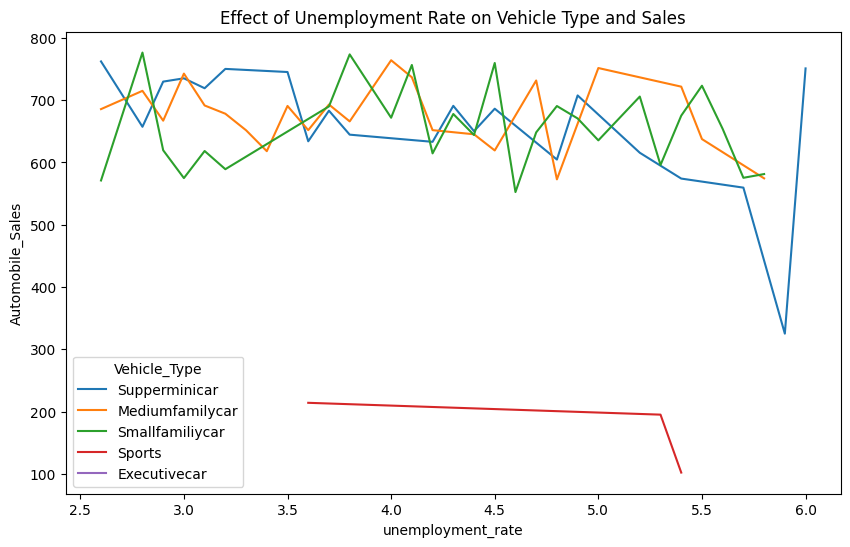

In [40]:
df_rec = df[df["Recession"] == 1]
plt.figure(figsize=(10, 6))
sns.lineplot(
    df_rec,
    x="unemployment_rate",
    y="Automobile_Sales",
    hue="Vehicle_Type",
    err_style=None,
).set_title("Effect of Unemployment Rate on Vehicle Type and Sales")
plt.show()

#### From the above plot, what insights have you gained on the sales of superminicar, smallfamilycar, mediumminicar?<br> Type your answer below:-


My answers:   
It is likely that all these (superminicar, smallfamilycar, mediumminicar) are closely related to unemployment. They fluctuate as the unemployment rate rises. The most significant rebound can be seen in superminicars, indicating that during economic downturns, people tend to choose superminicars due to their lower costs.